----------------------------------
# Project: AllLife Bank Unsupervised Learning
###     - Using KMeans & Hierarchical Clustering Models  -    By Josh Isaiah
----------------------------------

### Background and Context

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the **`penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help`**


Objective
1.	To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.
2.	Help to ensure customers queries are resolved faster
3.	Generate a set of insights and recommendations that will help the bank

Data Dictionary:
			
- Customer Key: Client number. Unique identifier for the customer
- Avg_Credit_Limit: Average Credit Limit on the Credit Card
- Total_Credit_Cards: Total Number of Credit cards own by the customer
- Total_visits_bank: Total number of customer visit to the bank
- Total_visits_online: Total number of customer online visits
- Total_calls_made: Total calls made to the bank


Data is of various customers of the bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.


### Quick Links

- <a href = #link1>Problem Statement </a>


- <a href = #link2>Libraries and Dataset Summary</a> 


- <a href = #link3>Exploratory Data Analysis</a>


- <a href = #link4>Data Pre-Processing </a> 


- <a href = #link5>KMeans Clustering</a>


- <a href = #link6>KMeans Cluster Profiling</a>


- <a href = #link7>Hierarchical Clustering</a>


- <a href = #link8>Hierarchical Cluster Profiling</a>


- <a href = #link9>KMeans Vs Hierarchical Model Performance</a>


- <a href = #link10>Business Recommendations</a>

### <a id = "link1"></a> Problem Statement 

Penetrate market to improve customer base and also upsell existing customers. This can be achieved by identifying different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

#### Initial Data Review from Domain summary:

**Some important Features that might improve market penetration and help to properly group the customers:**
   
- All except Customer Key & Sl No?
    
**Features that might not be important?**
- Customer Key & Sl No?

**Features that could have been included:**
- Frequency or time frame or range within which the customer visited the bank or online visit.  If the number of visit is over a month time, year, or week, etc.
- Customer Age - this might help with demography to know where the different ages are grouped in

### <a id = "link2"></a> Import Libraries and Dataset Summary

In [362]:
import warnings
warnings.filterwarnings("ignore")


# Libraries to help with reading and manipulating data and files
import pandas as pd
import numpy as np
import os

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 35)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#OR
from scipy.stats import zscore

# to compute distances
from scipy.spatial.distance import cdist #cdist - computes the distance of every point with the centroid points provided.
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform PCA
from sklearn.decomposition import PCA

#### Load and explore the data

In [278]:
# In this section the goals are to load the data into python and then to check its basic properties. 
# This will include the dimension, column types and names, and missingness counts.
CreditCardCustomer=pd.read_excel('Credit Card Customer Data.xlsx') # load dataset

In [279]:
#copy original data
data = CreditCardCustomer.copy()

In [280]:
# view first 50 data points
data.head(5)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [281]:
# view last 5 data points
data.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


#### Shape and information of Dataset

In [251]:
print('*********************** Data Info ***********************')
print(data.info())

print('\n','*********************** Data Shape (Rows, Columns) ***********************')
print(data.shape)

*********************** Data Info ***********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB
None

 *********************** Data Shape (Rows, Columns) ***********************
(660, 7)


#### Observations:
- `Sl_No` is probably the serial number which is similar to the index number. We will drop this column
- `Customer Key` is the unique customer ID, we will evaluate after checking for unique values later
- `Shape` of dataset has 7 Features (columns) and 660 rows
- All features are numeric, int64
- There are non-null values so no missing data

#### Checkig for missing values & Unique Values

In [12]:
# looking at which columns have the most missing values and the unique values numbers
print('*********************** Missing Values ***********************')
print(data.isna().sum().sort_values(ascending=False))

print('\n','*********************** Unique Values ***********************')
print(data.nunique().sort_values(ascending=False))

*********************** Missing Values ***********************
Total_calls_made       0
Total_visits_online    0
Total_visits_bank      0
Total_Credit_Cards     0
Avg_Credit_Limit       0
Customer Key           0
Sl_No                  0
dtype: int64

 *********************** Unique Values ***********************
Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_visits_online     16
Total_calls_made        11
Total_Credit_Cards      10
Total_visits_bank        6
dtype: int64


In [252]:
# Let's view each individual unique values to see if we can find any unusual number(s) or symbols or entries
# Source: Weekly Mentor class code
cols = data.columns

for col in cols:
    print("Unique values in the column '{}' are \n\n".format(col), data[col].unique())
    print("~" * 100)

Unique values in the column 'Sl_No' are 

 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236

In [13]:
# #loop through each  colum to see how often each entry occurs
for i in data.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*60)

Unique values in Sl_No are :
660    1
226    1
224    1
223    1
222    1
      ..
440    1
439    1
438    1
437    1
1      1
Name: Sl_No, Length: 660, dtype: int64
************************************************************
Unique values in Customer Key are :
47437    2
37252    2
97935    2
96929    2
50706    2
        ..
66706    1
72339    1
69965    1
85645    1
71681    1
Name: Customer Key, Length: 655, dtype: int64
************************************************************
Unique values in Avg_Credit_Limit are :
8000      35
6000      31
9000      28
13000     28
10000     26
          ..
25000      1
153000     1
111000     1
112000     1
106000     1
Name: Avg_Credit_Limit, Length: 110, dtype: int64
************************************************************
Unique values in Total_Credit_Cards are :
4     151
6     117
7     101
5      74
2      64
1      59
3      53
10     19
9      11
8      11
Name: Total_Credit_Cards, dtype: int64
*********************************

**Observations:**
* `All the features` have 0% missing values.
* The `Customer Key` feature has 5 customer keys that appeared more than once.  We will examine these rows in <a href = #link4>Data Pre-Processing </a> section

#### Data Summary

In [282]:
# dropping the serial no. column as it does not provide any information
data.drop("Sl_No", axis=1, inplace=True)

In [283]:
#confirm that `serial Number is dropped`
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 31.1 KB


In [255]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


**Observations:**
- The `Customer Key` does not provide any statistical value currently.
    - We will review if we need to keep `Customer Key` later in the <a href=#link4>Data Pre-Processing </a>
- `Average Credit Limit` for customer has an average of 34574. The 75% quantile is greater than the 50% indicating that the `Avg_Credit_Limit` is rightly skewed. This is expected for features dealing with money
- `Total_Credit_Cards` - Average number of total credit cards own by the customer with the bank is ~5, with max. being 10.  The minimum number of credit cards own is 1. This feature seems to be slightly rightly skewed as well
- `Total_visits_bank` - On a average, the customers visited the bank ~2 times. Some customers did not visit the bank, minimum total visits is 0. These could be customers that prefers using online or calling. The max. total bank visit is 5. The feature is fairly balance
- `Total_visits_online`- Max. number of online visits is 15. Shows that most customer visits online compared to bank visit. Average online visit is ~3.
- `Total_calls_made` - There are average of ~4 calls made with max. being 10

#### Checking for customers that did not visit bank if they did not visit online as well

In [256]:
data[(data.Total_visits_bank==0) & (data.Total_visits_online==0)]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


**Observations:**
- Customers that did not visit bank, definitely visited online as the querry above returns zero result

### <a id = "link3"></a>Exploratory Data Analysis

### Univariate analysis

In [88]:
# x=len(data.Total_visits_bank)
# x

In [89]:
# data.Total_visits_bank.nunique()

#### Function to Create Label Barplots

In [184]:
# function to create labeled barplots
#Source: Weekly mentored session code

def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels). Select number of categories to view
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    #get the % or values to place on top of the barplots
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        # position the annotations in the middle of the bars
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Print unique values for each feature to examine which feature we will analyze

In [185]:
print('\n','*********************** Unique Values ***********************')
print(data.nunique().sort_values(ascending=False))


 *********************** Unique Values ***********************
Customer Key           655
Avg_Credit_Limit       110
Total_visits_online     16
Total_calls_made        11
Total_Credit_Cards      10
Total_visits_bank        6
dtype: int64


#### Observation on Total Visits Online

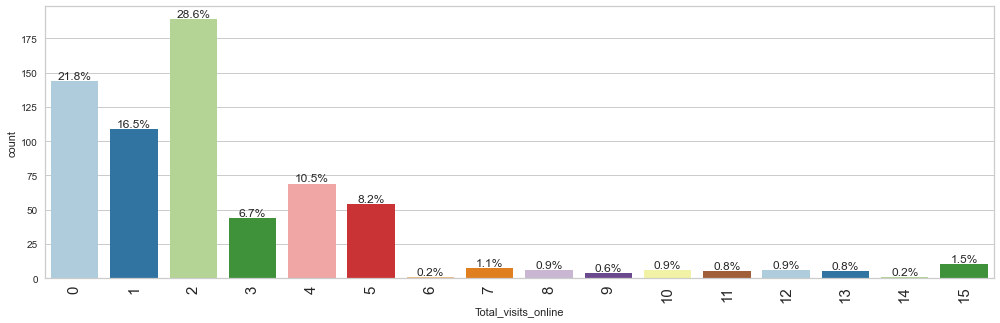

In [257]:
labeled_barplot(data, "Total_visits_online", perc=True)

**Observations**
- Approx. 29% of the customers visited online for some sort of querry 2 times
- Customers with most online visits are approx. 1.5%
- Approximately 22% of the customers did not visit online for querries

#### Observation on Total Calls Made

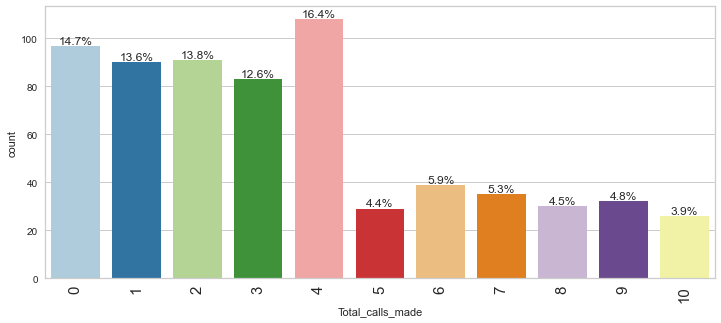

In [91]:
labeled_barplot(data, "Total_calls_made", perc=True)

**Observations**
- Approx. 16% of the customers called 4 times
- Customers with most calls, 10 times, are approx. 4%
- Approximately 15% of the customers did not call

#### Observation on Total Credit cards

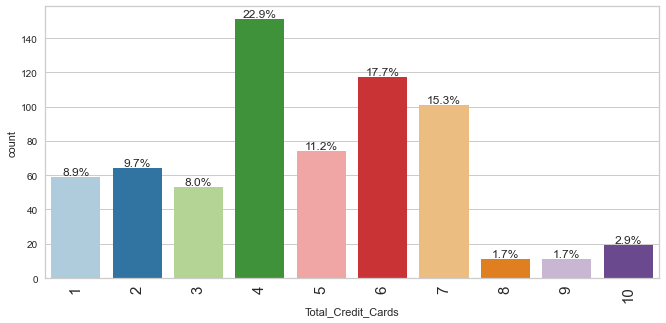

In [92]:
labeled_barplot(data, "Total_Credit_Cards", perc=True)

**Observations**
- Approx. 23% of the customers own 4 different credit cards
- Customers with most credit cards, 10 , are approx. 3%
- Approximately 9% of the customers only own 1 credit card
- Customers with 8 and 9 credit cards are ~2% respectively

#### Observation on Total bank Visits

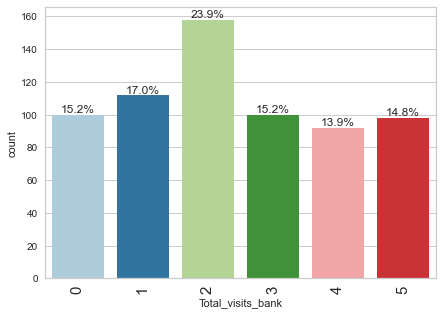

In [93]:
labeled_barplot(data, "Total_visits_bank", perc=True)

**Observations**
- Approx. 24% of the customers visited the bank twice
- Customers with most credit cards, 5 times , are approx. 15%
- Approximately 16% of the customers did not visit the bank.  These customers will obviously be using the online or call in 

**Function to create boxplot and histogram for any numerical feature**

In [187]:
## Source: Weekly Project code

# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='bisque') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=True, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='blue', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='red', linestyle='-') # Add median to the histogram

#### Observation on Total Visits Online

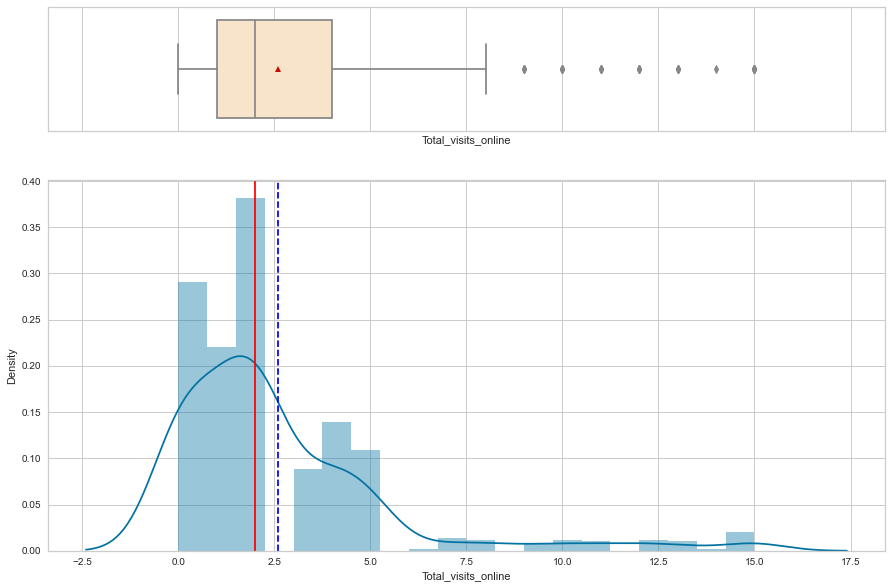

In [188]:
histogram_boxplot(data.Total_visits_online,bins=20)

**Observations:**
- Total online visits is rightly skewed
- Average online visit is between 2 - 3
- Showing that the higher visits are outliers

#### Observation on Total Calls Made

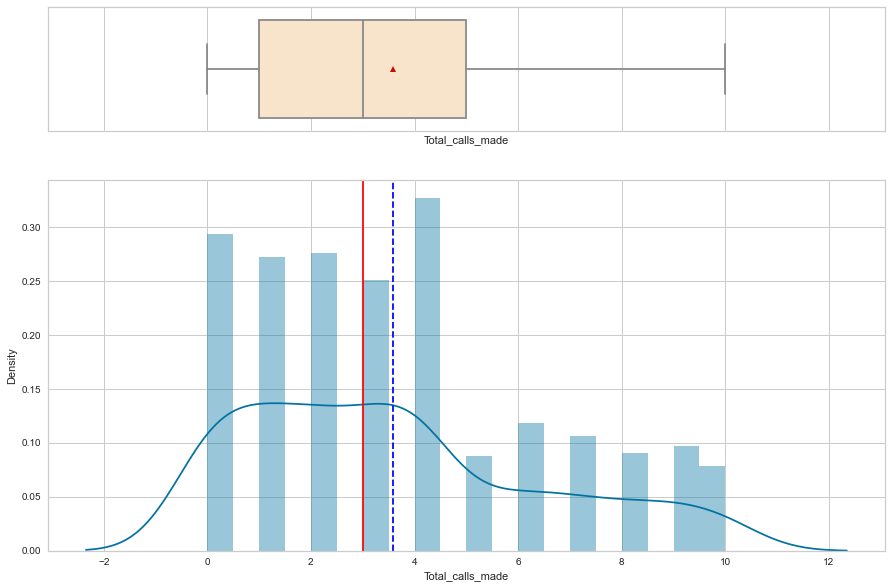

In [258]:
histogram_boxplot(data.Total_calls_made,bins=20)

**Observations:**
- Total calls made is rightly skewed
- Average total calls is between 3 - 4
- No outliers

#### Observation on Total Credit cards

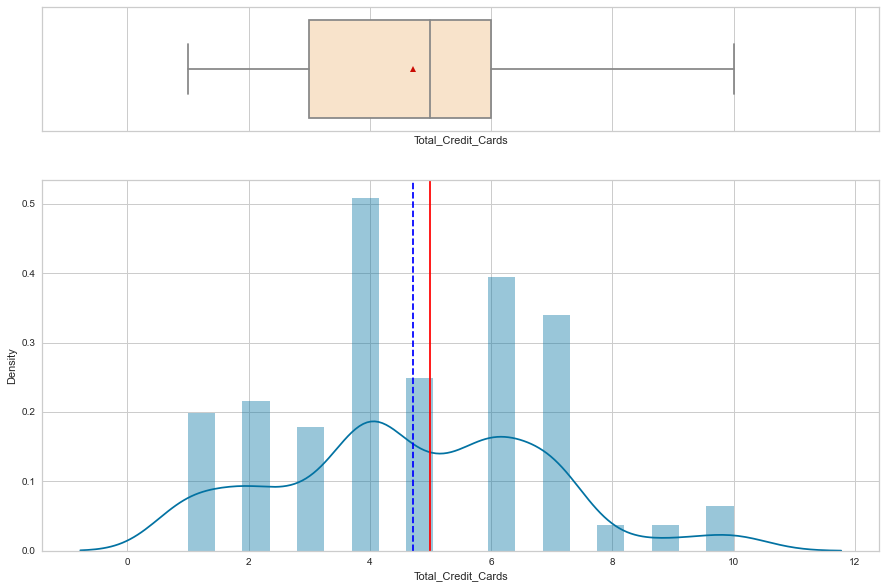

In [138]:
histogram_boxplot(data.Total_Credit_Cards,bins=20)

**Observations:**
- Total number of credit cards is also rightly skewed
- Average total number of credit is between 4 - 5
- No outliers

#### Observation on Total bank Visits

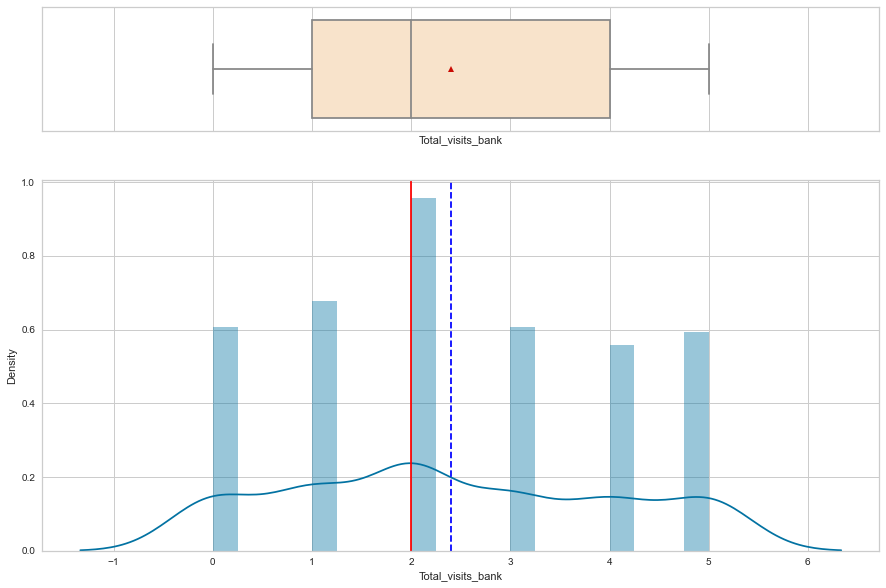

In [139]:
histogram_boxplot(data.Total_visits_bank,bins=20)

**Observations:**
- Total bank visits is fairly balanced, however not a clear evenly distributed profile
- Average bank visit is between 2 - 3 times
- No outliers

### Bivariate Analysis

- Let's look into bivariate analysis to see relationships between Features, and the independent variable

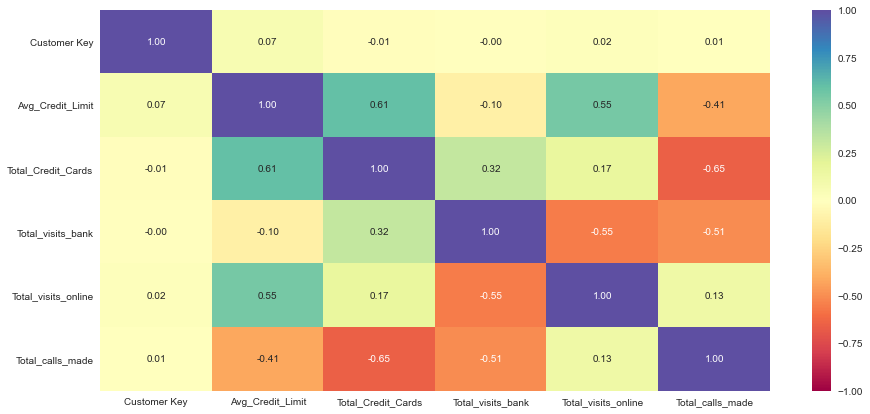

In [259]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

**Observations:**
- Total Credit cards has the highest correlation with number of calls made, however this is a negative correlation. Indicating that the customers with higher credit cards tends to call less.
- Total Online visit also has a negative correlation with Total bank visits. Which makes sense, meaning the clients that performs online querry tends not to visit the bank.
- Average Credit limit is positively correlated to the Total Credit Cards. Which indicates that the higher the number of credit card the higher the average credit limit 
- Total online visits has a positive correlation with the Average Credit limit. 

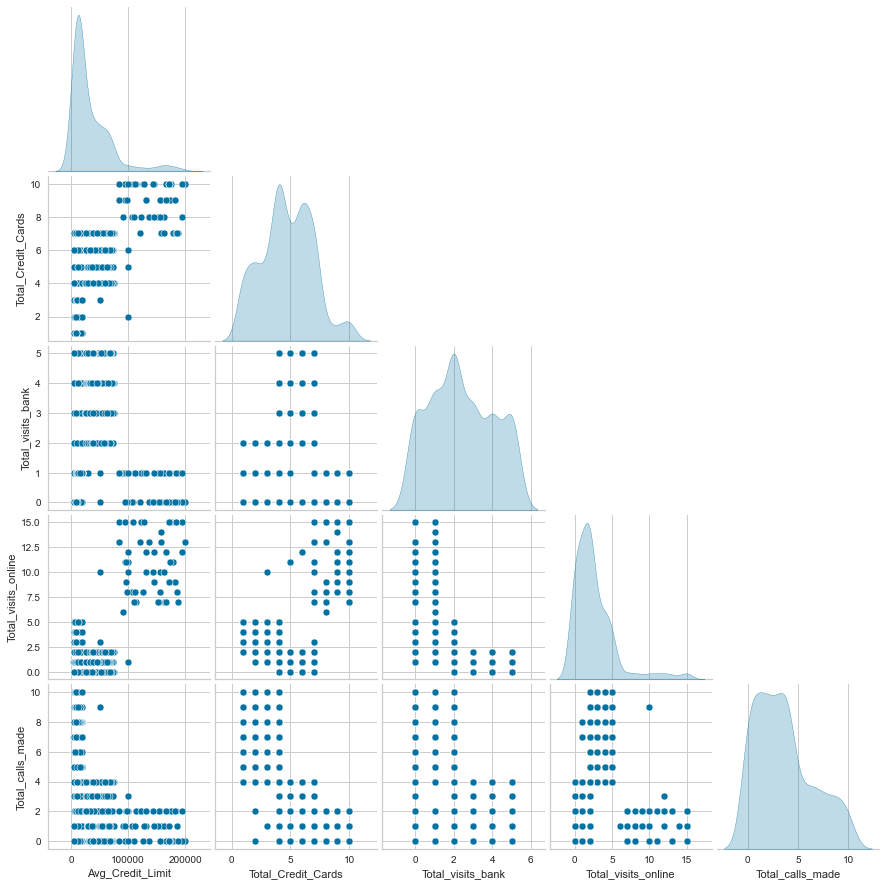

In [260]:
sns.pairplot(data=data.iloc[:,1:], diag_kind="kde",corner=True) # pairplot for all columns except Customer Key
plt.show()

**Observation:**
- The distribution is showing multi-modal distribution. Some of the features are indicating we could have 3 to 4 groups
- This is only giving us an insight before we perform our cluster analysis

### <a id = "link4"></a>Data Pre-Processing

#### Looking at Customer Key feature with repeated rows

- 47437  -  2
- 37252  -  2
- 97935  -  2
- 96929  -  2
- 50706  -  2

In [284]:
lookup=[47437,37252,97935,96929,50706]
lookup

[47437, 37252, 97935, 96929, 50706]

In [285]:
data[(data['Customer Key'].isin(lookup))].sort_values(by='Customer Key',ascending=True)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,37252,6000,4,0,2,8
432,37252,59000,6,2,1,2
4,47437,100000,6,0,12,3
332,47437,17000,7,3,1,0
411,50706,44000,4,5,0,2
541,50706,60000,7,5,2,2
391,96929,13000,4,5,0,0
398,96929,67000,6,2,2,2
104,97935,17000,2,1,2,10
632,97935,187000,7,1,7,0


In [286]:
# data[(data['Customer Key']==97935)]

In [287]:
# data[(data['Customer Key']==96929)]

**Observation:**
- The repeated values in the Customer Key feature does not indicate duplicated rows. Hence, we will not remove the rows with repeated values in the Customer Key
- However, we will drop the Customer Key. I think with these repeated values, it might force the model to cluster these rows with same Customer Keys into same clusters which might not be the case.
    - Looking at the individual rows with same Customer Key values, you can see that there are differences in the customer information when analyzing the other features

In [288]:
#### Drop Customer Key feature
data.drop('Customer Key',inplace=True,axis=1)

In [289]:
### Check if Customer Key feature is dropped
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


#### Outlier Treatment
- There are 7 outliers in the Total online visit features.  It is expected that most customers will visit online than others. Hence we will not treat this outliers. We will utilize the data as it is in the model

#### Missing Value Treatment
- There are no missing value, hence we will not perform any imputation

##### Check for duplicated rows

In [290]:
duplicate = data[data.duplicated(keep=False)].sort_values(by='Avg_Credit_Limit',ascending=False) 
# Source: https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
# print(len(duplicate))
# if len(duplicate)>0:
#     print("These are rows with Duplicates :")
#     duplicate.head()
# else:
#     print("There are no duplicates in the dataset")

duplicate

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
497,52000,4,2,1,2
464,52000,4,2,1,2
455,47000,6,2,0,4
425,47000,6,2,0,4
361,18000,6,3,1,4
250,18000,6,3,1,4
378,12000,6,5,2,1
320,12000,6,5,2,1
257,10000,6,4,2,3
295,10000,6,4,2,3


In [291]:
len(duplicate)/2

11.0

**There are 11 entries that have duplicates in the dataset**

In [229]:
# df.loc[df.duplicated(keep=False), :].sort_values(by='Avg_Credit_Limit',ascending=False)
# keep = False shows all entries that are duplicates
#Source : https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f

In [292]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


**Drop duplicates**

In [234]:
# xxx=data.copy()
# xxx.info()

In [235]:
# xxx.drop_duplicates()

In [295]:
data.drop_duplicates(inplace=True)

In [296]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     649 non-null    int64
 1   Total_Credit_Cards   649 non-null    int64
 2   Total_visits_bank    649 non-null    int64
 3   Total_visits_online  649 non-null    int64
 4   Total_calls_made     649 non-null    int64
dtypes: int64(5)
memory usage: 30.4 KB


#### Scale data ready for Modeling

In [297]:
# scale using scipy zscore

df = data.copy()
df_scaled_scipy=df.apply(zscore)

#scale using Standardscalar

scaler=StandardScaler()

df_scaled_sc=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)


In [372]:
#Scaling with MinMaxScaler to enable us do visualization
df_min_max = data.values #returns a numpy array
min_max_scaler = MinMaxScaler()
df_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(df_min_max),columns=data.columns)
df_min_max_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0.492386,0.111111,0.2,0.066667,0.0
1,0.238579,0.222222,0.0,0.666667,0.9
2,0.238579,0.666667,0.2,0.200000,0.4
3,0.137056,0.444444,0.2,0.066667,0.4
4,0.492386,0.555556,0.0,0.800000,0.3


In [298]:
df_scaled_scipy.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.723499,-1.247087,-0.860606,-0.550407,-1.248443
1,0.400209,-0.786701,-1.476410,2.499808,1.881237
2,0.400209,1.054846,-0.860606,0.127419,0.142526
3,-0.129107,0.134072,-0.860606,-0.550407,0.142526
4,1.723499,0.594459,-1.476410,3.177634,-0.205216


In [299]:
df_scaled_sc.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.723499,-1.247087,-0.860606,-0.550407,-1.248443
1,0.400209,-0.786701,-1.476410,2.499808,1.881237
2,0.400209,1.054846,-0.860606,0.127419,0.142526
3,-0.129107,0.134072,-0.860606,-0.550407,0.142526
4,1.723499,0.594459,-1.476410,3.177634,-0.205216


#### Using zscore from scipy or StandardScaler provides the same result

In [301]:
df_scaled=df_scaled_scipy.copy()

### <a id = "link5"></a>KMeans Clustering Model

#### Applying KMeans to a range of clusters to perform elbow plot and determine Silhouette Score

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

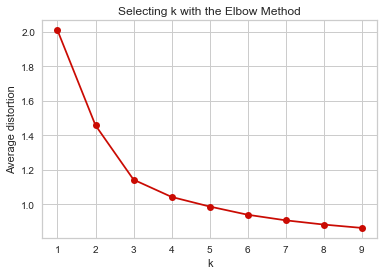

In [315]:
#Finding optimal no. of clusters

#cdist - computes the distance of every point with the centroid points provided.

clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_scaled)
    prediction=model.predict(df_scaled)
    meanDistortions.append(sum(np.min(cdist(df_scaled, model.cluster_centers_, 'euclidean'), axis=1))
                           / df_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'ro-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

**Observation:**
- The elbow seems to start at 3 or 4. Meaning the appropriate number of clusters, k, could be 3 or 4. 

**Let's check the silhouette scores.**

For n_clusters = 2, silhouette score is 0.41800025566689647
For n_clusters = 3, silhouette score is 0.516281010855363
For n_clusters = 4, silhouette score is 0.3570238219413198
For n_clusters = 5, silhouette score is 0.2730908848204728
For n_clusters = 6, silhouette score is 0.25710806235819067
For n_clusters = 7, silhouette score is 0.24785565102529208
For n_clusters = 8, silhouette score is 0.22689819250624121
For n_clusters = 9, silhouette score is 0.21059004408032791
For n_clusters = 10, silhouette score is 0.21402354795942496


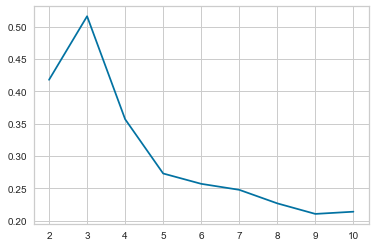

In [318]:
sil_score = []
cluster_list = list(range(2, 11))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((df_scaled))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(df_scaled, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

- **From the silhouette scores, it seems that 3 is a good value of k. Which confirms the elbow curve result**

**We will proceed with using SilhouetteVisualizer to view values for k=3, 4 and 5**

**SilhouetteVisualizer using K = 5**

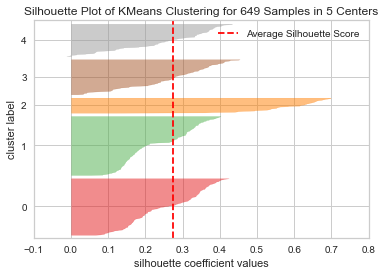

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 649 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [317]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(df_scaled)
visualizer.show()

**Observation:**
- Average Silhouette score for K=5 is ~0.27
- 3 of the 5 clusters seems to be in same range of silhouette score with 1 of them having a silhouette score of ~0.69, which is a higher quality. However, it seems there are not enough datapoint in this cluster
- The other clusters have good thickness with enough data point

**SilhouetteVisualizer using K = 4**

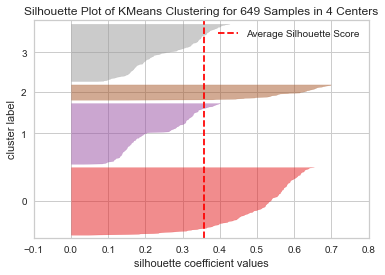

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 649 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [319]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(df_scaled)
visualizer.show()

**Observation:**
- Average Silhouette score for K=4 is ~0.36
- 2 of the 4 clusters seems to be in same range of the average silhouette score with 2 of them having a silhouette score of ~0.63 & ~0.7. The two have higher quality scores.  1 of the 2 seems not to have enough datapoint
- The other clusters have good thickness with enough data point

**SilhouetteVisualizer using K = 3**

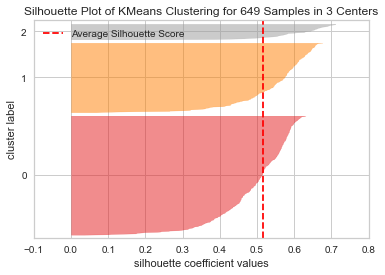

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 649 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [320]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(df_scaled)
visualizer.show()

**Observation:**
- Average Silhouette score for K=3 is ~0.52
- All three clusters have higher silhouette scores that the average
- 2 of the 3 cluster have great data point indicating the thickness
- The cluster with the highers silhouette sore has a value of ~0.71 and decent number of data points

**We will use 3 as the cluster numbers because the the silhouette score is high enough and there is change in the elbow direction at 3 in the elbow curve.**

### KMeans Model

In [321]:
KM = KMeans(n_clusters=3, random_state=1)
KM.fit(df_scaled)

KMeans(n_clusters=3, random_state=1)

In [373]:
# adding kmeans cluster labels to the original dataframe
df["Clusters_Groups"] = KM.labels_
df_scaled["Clusters_Groups"]=KM.labels_
df_min_max_scaled["Clusters_Groups"]=KM.labels_

### <a id = "link6"></a>KMeans Clustering Profiling

In [377]:
# df_min_max_scaled.groupby("Clusters_Groups")["Total_Credit_Cards"].count().values

In [367]:
KM_cluster_profile = df.groupby("Clusters_Groups").mean()

In [368]:
KM_cluster_profile.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Clusters_Groups,,,,,
0,12239.819005,2.411765,0.945701,3.561086,6.891403
1,34071.428571,5.518519,3.484127,0.981481,1.992063
2,141040.000000,8.740000,0.600000,10.900000,1.080000


In [369]:
#Getting the total count for each clusters using any of the features.  It does not matter which feature we use in the 
# code below, the total count will be same.
KM_cluster_profile["Customer_Count_In_Each_Cluster"] = (
    df.groupby("Clusters_Groups")["Total_Credit_Cards"].count().values
)
KM_cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Customer_Count_In_Each_Cluster
Clusters_Groups,,,,,,
0,12239.819005,2.411765,0.945701,3.561086,6.891403,221
1,34071.428571,5.518519,3.484127,0.981481,1.992063,378
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


In [340]:
# KM_cluster_profile["Count_in_each_segment_By_Total_CC"] = (
#     df.groupby("Clusters_Groups")["Total_calls_made"].count().values
# )
# KM_cluster_profile

In [341]:
# # KM_cluster_profile["Count_in_each_segment_By_Bank"] = (
# #     df.groupby("Clusters_Groups")["Total_visits_bank"].count().values
# # )

# KM_cluster_profile.drop('Count_in_each_segment_By_Total_CC',inplace=True,axis=1)

In [345]:
# let's display cluster profiles
KM_cluster_profile.style.highlight_max(color="yellow", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Customer_Count_In_Each_Cluster
Clusters_Groups,,,,,,
0,12239.819005,2.411765,0.945701,3.561086,6.891403,221
1,34071.428571,5.518519,3.484127,0.981481,1.992063,378
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


**Observation:**
- Max. Credit limit is in Cluster #2 with average of 141,000
- Max. total number of credit cards is also in cluster #2 with approximately 9 credit cards
- Max. Total bank visit is in cluster #1 with approx. 3 visits
- Cluster #1 has the highest number of customers when compared to all others
- Cluster #0 made more calls compared to others
- Online visitors are max. in cluster #2

**Visualizing Features in Each Cluster with BoxPlot**

In [347]:
df.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made', 'Clusters_Groups'],
      dtype='object')

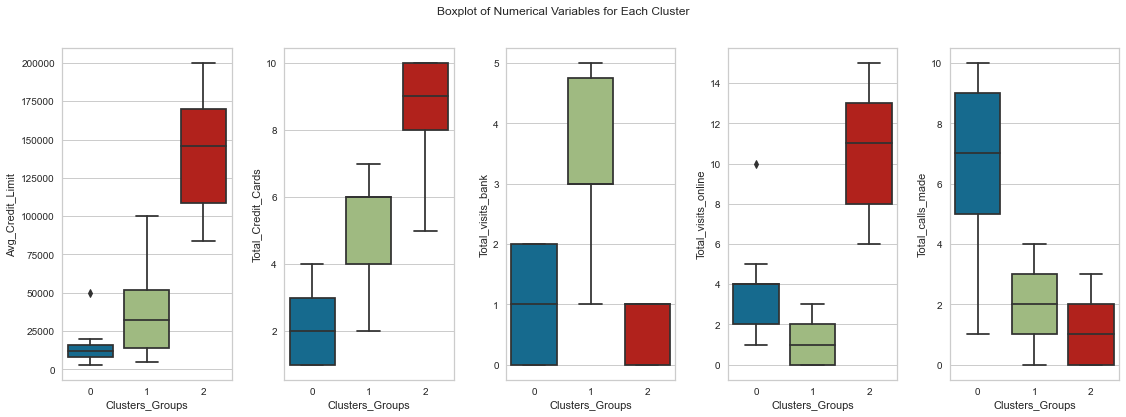

In [385]:
cols=['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank','Total_visits_online', 'Total_calls_made']

fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of Numerical Variables for Each Cluster")
counter = 0
for kk in range(5):
    sns.boxplot(ax=axes[kk], y=df[cols[counter]], x=df["Clusters_Groups"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

<AxesSubplot:xlabel='Clusters_Groups'>

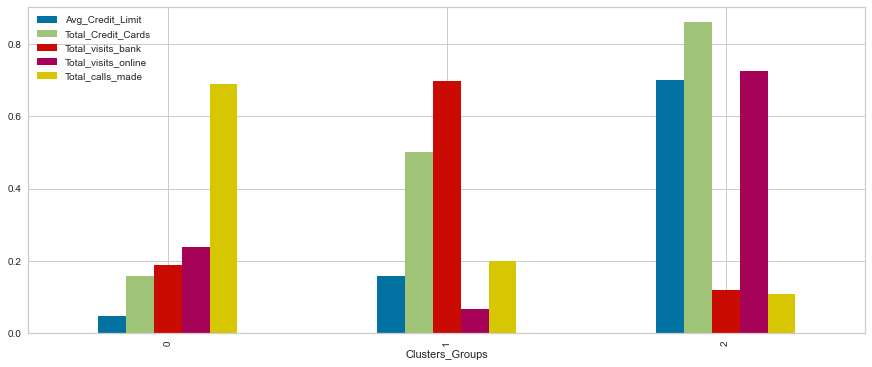

In [371]:
df_min_max_scaled.groupby("Clusters_Groups").mean().plot.bar(figsize=(15, 6))

### Insights - KMeans Clusters Profile 

- **Cluster 0**:
    - Average Credit Limit is for this cluster ranges from 0 - 50,000
    - Total Credit card has a max. of 4 for this cluster.
    - Total bank visit ranges from 0 to 2
    - Total online visit ranges from 1 to 10
    - Total calls made has a wider range of 1 to 10. And it has the highest for this cluster


- **Cluster 1**:
    - Average Credit Limit is for this cluster is higher than that for cluster 0, maxing at 100,000
    - Total Credit card has a range of 2 to 7
    - Total bank visit in this cluster is the highest between all the clusters, with max. at 5
    - Total online visit for this cluster is the least in all the clusters, maxing at 3
    - Total calls made max. at 4


- **Cluster 2**:
    - Average Credit Limit is highest for this cluster. Cluster 2 contains the customers with higher credit limit, max. at 200,000
    - Total Credit card has a range of 5 to 10, which corresponds to the high average credit limit
    - Total bank visit is low, with max. of 1, which is the lowest of all 3 clusters
    - Total online visit is higher for this cluster, and ranges from 6 to 15. It is the highest of all three clusters
    - Total calls made max. at 3, it is the lowest of all three clusters

### <a id = "link7"></a>Hierarchical Clustering

#### Create new scaled data

In [386]:
# scale using scipy zscore

dfh = data.copy()
dfh_scaled_scipy=dfh.apply(zscore)

#scale using Standardscalar

sc=StandardScaler()

dfh_scaled_sc=pd.DataFrame(sc.fit_transform(dfh),columns=dfh.columns)


#Scaling with MinMaxScaler to enable us do visualization if needed
dfh_min_max = data.values #returns a numpy array
min_max_scaler = MinMaxScaler()
dfh_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(dfh_min_max),columns=data.columns)
# df_min_max_scaled.head()

In [390]:
dfh_scaled_scipy.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.723499,-1.247087,-0.860606,-0.550407,-1.248443
1,0.400209,-0.786701,-1.476410,2.499808,1.881237
2,0.400209,1.054846,-0.860606,0.127419,0.142526
3,-0.129107,0.134072,-0.860606,-0.550407,0.142526
4,1.723499,0.594459,-1.476410,3.177634,-0.205216


In [391]:
dfh_scaled=dfh_scaled_scipy.copy()

In [407]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = [ "complete", "average", "single",'centroid','weighted']

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        if lm =='centroid': dm='euclidean'
        Z = linkage(dfh_scaled, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(dfh_scaled))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and complete linkage is 0.8794736468795109.
Cophenetic correlation for Euclidean distance and average linkage is 0.8974425535306298.
Cophenetic correlation for Euclidean distance and single linkage is 0.7395135051413775.
Cophenetic correlation for Euclidean distance and centroid linkage is 0.894471288720818.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8551098644586315.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8578617029322211.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8960370054789858.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7379112982920528.
Cophenetic correlation for Euclidean distance and centroid linkage is 0.894471288720818.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8551098644586315.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6513369047977703.
Cophenetic corre

**Getting the highest Combination of Distance metric and linkage method**

In [409]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1].capitalize()
    )
)

Highest cophenetic correlation is 0.8974425535306298, which is obtained with Euclidean distance and Average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [410]:
# list of linkage methods. We already used some of these linkage methods above, however let's re-run them
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(dfh_scaled, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(dfh_scaled))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7395135051413775.
Cophenetic correlation for complete linkage is 0.8794736468795109.
Cophenetic correlation for average linkage is 0.8974425535306298.
Cophenetic correlation for centroid linkage is 0.894471288720818.
Cophenetic correlation for ward linkage is 0.7425813590948763.
Cophenetic correlation for weighted linkage is 0.8551098644586315.


In [411]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1].capitalize()
    )
)

Highest cophenetic correlation is 0.8974425535306298, which is obtained with Average linkage.


**Re-running the linkage methods with Euclidean distance metric confirms that the maximum cophenitic coefficient is with Euclidean distance and Average linkage.**

**Let's see the dendrograms for the different linkage methods.**

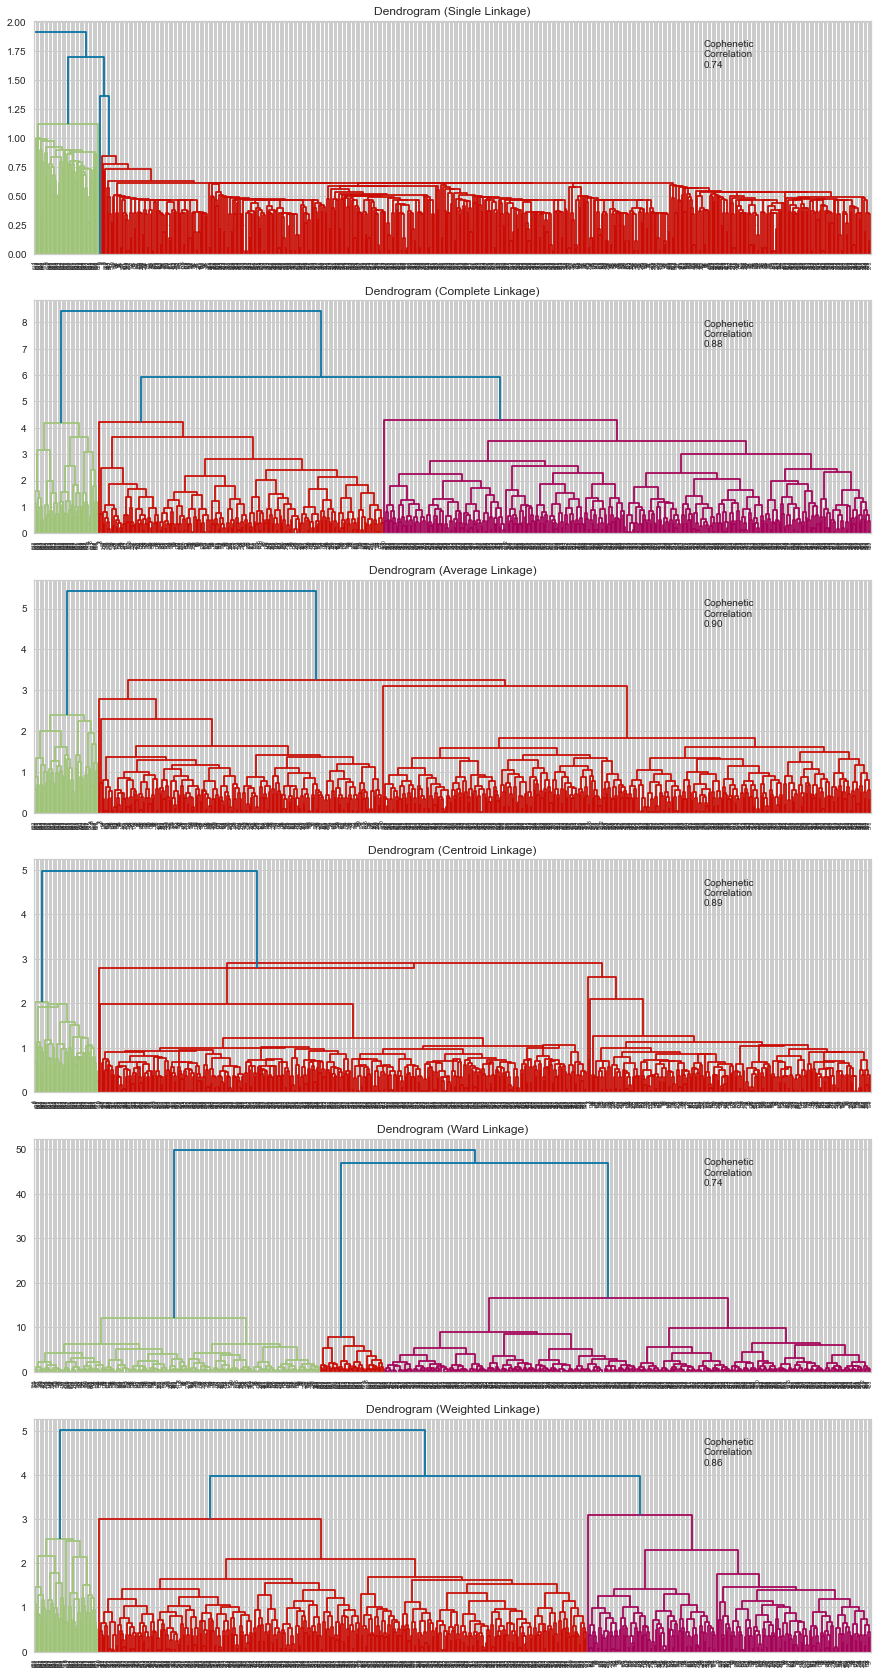

In [412]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(dfh_scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(dfh_scaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

- The cophenetic correlation is highest for average
- Ward Linkage has a low cophenetic correlation, it does provides a better/clearer distribution of the clusters and properly segmented in the dendogram. However, it is computationally expensive
- Weighted Linkage has a cophenetic correlation of 0.86, it has a distinct segmentation of the clusters in the dendogram, similar to Ward but with higher cophenetic correlation
- Complete Linkage has a high cophenetic correlation of 0.88 and has a similar Dendogram distribution like the Weighted linkage
- We will move ahead with Complete linkage.
- 3 appears to be the appropriate number of clusters from the dendrogram for Complete linkage.

### Hierarchical Model

In [416]:
HC_model = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="complete")
HC_model.fit(dfh_scaled)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [418]:
dfh_scaled["HC_Clusters"] = HC_model.labels_
dfh["HC_Clusters"] = HC_model.labels_
dfh_min_max_scaled["HC_Clusters"] = HC_model.labels_

### <a id = "link8"></a>Hierarchical Clustering Profiling

In [420]:
Hcluster_profile = dfh.groupby("HC_Clusters").mean()
Hcluster_profile.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
HC_Clusters,,,,,
0,34010.582011,5.515873,3.486772,0.984127,1.992063
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12343.891403,2.416290,0.941176,3.556561,6.891403


In [422]:
Hcluster_profile["H_Customer_Count_In_Each_Cluster"] = (
    dfh.groupby("HC_Clusters")["Total_calls_made"].count().values
)

In [423]:
# let's display cluster profiles
Hcluster_profile.style.highlight_max(color="yellow", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,H_Customer_Count_In_Each_Cluster
HC_Clusters,,,,,,
0,34010.582011,5.515873,3.486772,0.984127,1.992063,378
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12343.891403,2.416290,0.941176,3.556561,6.891403,221


**Observation:**
- Max. Credit limit is in Cluster #1 with average of 141,000 and the least is in cluster #2
- Max. total number of credit cards is also in cluster #1 with approximately 9 credit cards and cluster #1 has the least
- Max. Total bank visit is in cluster #0 with approx. 3 visits and the least is in cluster #2
- Cluster #1 has the highest number of customers
- Max. calls were made in cluster #0 with least calls being in cluster #2
- Cluster #2 are the most online active users

**Visualizing Features in Each Cluster with BoxPlot**

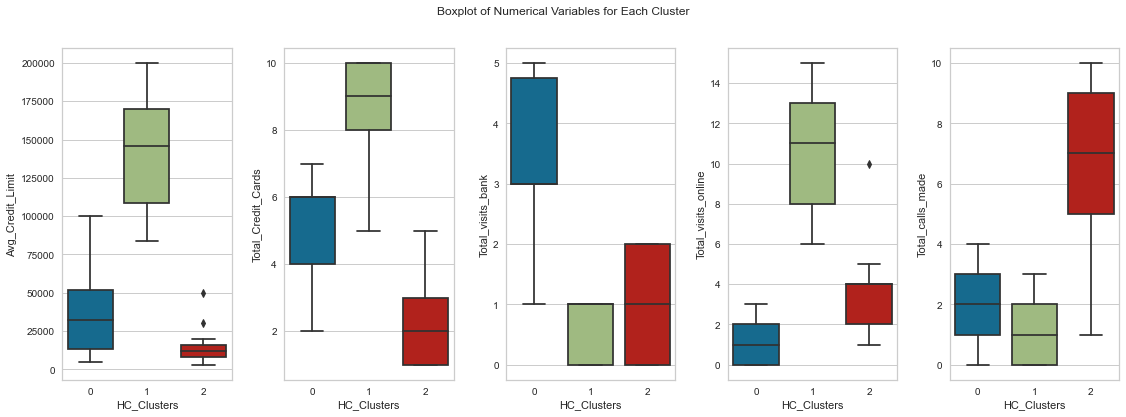

In [424]:
hcols=['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank','Total_visits_online', 'Total_calls_made']

fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of Numerical Variables for Each Cluster")
counter = 0
for kk in range(5):
    sns.boxplot(ax=axes[kk], y=dfh[hcols[counter]], x=dfh["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [448]:
# plot = Hcluster_profile[hcols].plot.pie(autopct="%.1f%%", subplots=True, figsize=(15, 8))

<AxesSubplot:xlabel='HC_Clusters'>

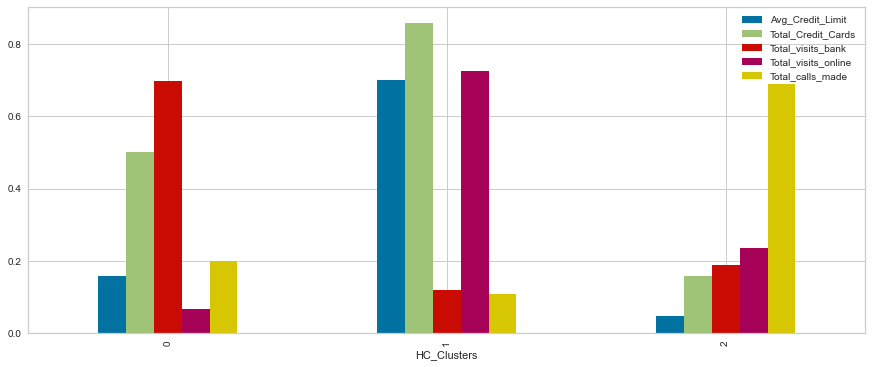

In [447]:
dfh_min_max_scaled.groupby("HC_Clusters").mean().plot.bar(figsize=(15, 6))

### Insights - Hierarchical Clusters Profile 


- **Cluster 0**:
    - Average Credit Limit max. for this cluster is 100,000 with minimum of about 5,000
    - Total Credit card ranges between 2 to 7
    - Total bank visit is the highest in cluster 0 compared to other clusters. Max. visit is 5 with minimum of 1
    - Total online visit is least in cluster 0 compared to the others. Max. online visit is 3
    - Total calls made ranges between 0 to 4


- **Cluster 1**:
    - Average Credit Limit is for this cluster is higher than that for cluster 0, maxing at 200,000. This cluster has the highest average credit limit compared to the others
    - Total Credit card has a range of 5 to 10, which is the highest of all the clusters
    - Total bank visit in this cluster is the least, 1, compared to all other clusters
    - Total online visit for this cluster is highest of all three, ranging between 6 to 15
    - Total calls made is the least of all clusters, 0 to 3


- **Cluster 2**:
    - Average Credit Limit is least for this cluster. Cluster 2 contains the customers with lower credit limit, max. at 50,000
    - Total Credit card has a max. value of 5
    - Total bank visit ranges between 0 to 2
    - Total online visit is between 1 to 5
    - Total calls made is the highest when compared to other clusters, 1 to 10

### <a id = "link9"></a>KMeans Vs Hierarchical Model Performance

Based on the modeling parameters chosen based on Sihouette score, elbow curve, dendogram, cophenetic coefficient, linkage method, and distance metric we can summarize the following difference and similarities between both models:
- Both models, KMeans and Hierarchical have very similar perfomance in cluster/group selection
- They both optimized their models to select 3 clusters as the best clusters
- The number of customers in each clusters are similar except that the cluster index (numbering) are different

| # | KMeans |Hierarchical |
| :- | :- | :- |
| A | Cluster 0 | Cluster 2 |
| B | Cluster 1 | Cluster 0 |
| C | Cluster 2 | Cluster 1 |

`Source: https://stackoverflow.com/questions/48655801/tables-in-markdown-in-jupyter`

### <a id = "link10"></a>Business Recommendations - KMeans/Hierarchical

- **Cluster 0/2**: The average credit limit is the lowest for this cluster in all the clusters.  Increasing credit limit for customers to allow them increase their spending will be recommended.  They also tend to have the highest total calls.  They can be targetted with promotions when they call and offer them deals after the reason they called is resolved. Get their feedback after every call on how the support system performed to help improve better. They averagely visit online and bank. They can also be offered deals when they login. The marketing team can also look into issuing new credit cards to this group


- **Cluster 1/0**: Credit limit is a little bit higher than Cluster 0/2, however they tend to visit the bank more often. They have reasonable number of credit cards, increasing their credit limit will definitely persuade them to stick around and spend more. This group of customers likes to visit the bank more than online, so it will be great to check in with them when they come into the banking hall and provide new promotions. 



- **Cluster 2/1**: This cluster i think has the best profile that the bank can model.  High average credit limit, avid online users, high number of credit cards, minimal calls made to the bank for querries. These customers should be surveyed to ask them what they like about their credit card and the bank services.  The marketing and sales team can improve on this and have a scaled down version to target other customers.